# Importamos librerias  	


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

# Importamos BB.DD

In [3]:
df_orig = pd.read_csv("datos/netflix_originals.csv", index_col=0)
df_titles= pd.read_csv("datos/netflix_titles.csv",index_col=0)

# 2. Analisis de columnas y consistencias

## Netflix_Titles - df_titles

### Visualizacion general del df

In [4]:
df_titles

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,NaN,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,NaN,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,NaN,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


### Visualizacion info especifica del df

In [5]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      3994 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 894.5+ KB


- Con la funcion info podemos observar que exites 8807 peliculas, series y documentales. 
- La mayoria de las columnas son de tipo objeto, menos el año de lanzamiento. Lo curioso es que la duracion esta puesta como objeto(string), al igual que la fecha de lanzamiento. 
- Tenemos muchos datos nulos en lo que es directores y ni hablar a lo que se refiere en la duracion.

### Hacemos un analisis descriptivo de los titulos

In [6]:
df_titles.describe(include=['object', 'category'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,3994,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,185,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,2 Seasons,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,425,362,4


- podemos ver que existen unicamente 2 tipos de contenidos -> peliculas y series
- titulos todos diferentes por lo que no hay valores duplicados
- directores hay 4528 que tienen su contenido en plataforma
- Respecto a los paises el que mayor contenido produce es estados unidos con 2818. 
- el genero con mayor contenido es lo que son los dramas internacionales.

In [7]:
df_titles.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


Respecto a variable numerica a analizar solo contamos con el año de lanzamiento
- La media dio en 2014 pero la mediana es 2017
- El 75% del contenido se lanzo antes de 2019.

### Checkeamos nulos de df_titles

- ### Creamos funcion buscar_nulos() para poder pasar dataframe que quiseramos y asi encontrar aquellos valores faltantes en cada columna

In [8]:
def buscar_nulos(df):
    #Creamos Df vacio
    df_titulos_nulos=pd.DataFrame()

    df_titulos_nulos["Numero_Nulos"] = df.isnull().sum() #Creamos columna de nulos -> si isnull()=True= 1 => si sumamos todos, nos da el numero de nulos
    df_titulos_nulos["porcentaje_nulos"] = round((df.isnull().sum()/df.shape[0])*100,2) #Para saber el porcenaje de nulos, lo dividimos sobre la cantidad de filas que tiene nuesto df
    return df_titulos_nulos.T



In [9]:
buscar_nulos(df_titles) 	

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
Numero_Nulos,0.0,0.0,0.0,2634.00,825.00,831.00,10.00,0.0,4.00,4813.00,0.0,0.0
porcentaje_nulos,0.0,0.0,0.0,29.91,9.37,9.44,0.11,0.0,0.05,54.65,0.0,0.0


- Casi el 30% de la categoria director no tenemos conocimiento de quien hizo ese contenido
- Otro dato grave que desconocemos es el la duracion del contenido. Mas del 54% desconocemos cuanto dura.
- Con valores similares, el reparto y de que pais proviene el contenido, tienen un poco mas del 9% de nulos. 

### Checkeamos duplicados de df_titles

#### Creamos funcion para reconocer duplicados

In [10]:
def duplicados(df):
    return df.duplicated().sum()

### Buscando en todo el data frame de titulos.

In [11]:
duplicados(df_titles)

np.int64(0)

- No contamos con valores duplicados en la base de datos de titulos de netflix.

### Buscando especificamente si hay titulos repetidos

In [12]:
duplicados(df_titles["title"])

np.int64(0)

- Tampoco contamos con duplicados en lo que es especificamente los titulos. Es decir, no tenemos ningun titulo que se repite de los 8807.

## Creamos funcion para ver los valores unicos por columna

In [13]:
def valores_unicos_columnas(df, columna=None):
    #creamos df vacio
    df_val_unico=pd.DataFrame()
    # llenamos el df con los tiposs y valores
    df_val_unico["tipo"] = df[columna].unique()
    df_val_unico["cantidad"] = df[columna].value_counts().values

    return df_val_unico

## Vemos que tipo de contenido es el mayor subido

In [14]:
tipos_contenidos = valores_unicos_columnas(df_titles, columna="type")
tipos_contenidos

,tipo,cantidad
0,Movie,6131
1,TV Show,2676


C:\Users\Agus\AppData\Local\Temp\ipykernel_19744\1819344265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "type",


Text(0, 0.5, 'cantidad')

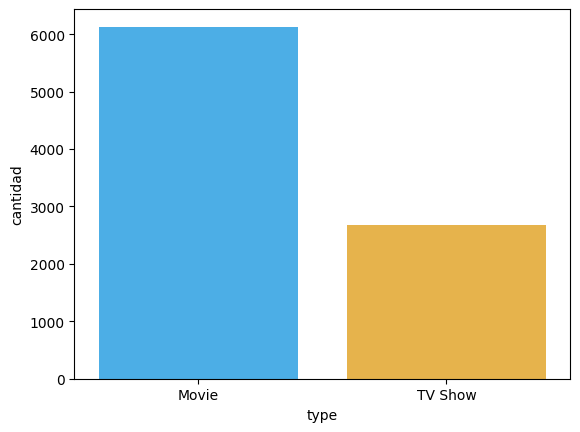

In [45]:
sns.countplot(x = "type", 
              data = df_titles, 
              palette=["#33B5FF", "#FFBB33"]
              )
plt.ylabel("cantidad")


- la mayoria del contenido de la bbdd de titulos son peliculas

# Conclusiones EDA -> df_titles
- Existen columnas de datos que no tienen el tipo correcto de dato. Por ejemplo: Duration(hay algunos que dicen 2 seasons) y fecha de agregacion (esta en formato largo) a la plataforma
- Tomar accion con los nulos en df_titles
    -   Por del 54% no tenemos conocimiento de cuanto dura el contenido. Altamente grave ya que no podemos saber que prefiere la gente cuando se trata de duracion.
    -   Casi el 30% del contenido no tiene directores. 
    -   Casi el 10% del contenido no tiene el reparto ni de que pais es el mismo.
    -   Podemos omitir el contenido date_added y rating rellenandolo con la mediana de cada uno, o la moda. 
- No contamos con datos duplicados en la bbdd ya que todos los titulos son diferentes
- Existen unicamente 2 tipos de contenidos -> peliculas y series
- Contamos con informacion de que hay 4528 directores en la plataforma
- Respecto a los paises, el que mayor contenido produce es EEUU con 2818. 
- El genero con mayor contenido es lo que son los dramas internacionales.


## Netflix_originals - df_orig


### Visualizacion general del df

In [16]:
df_orig

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English


### Visualizacion info especifica del df

In [17]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
Index: 513 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       513 non-null    object 
 1   Genre       513 non-null    object 
 2   Premiere    513 non-null    object 
 3   Runtime     513 non-null    int64  
 4   IMDB Score  513 non-null    float64
 5   Language    513 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 28.1+ KB


Respecto a los titulos originales de netflix podemos detacar que:
- No se encontraron nulos
- Son un total de 513 peliculas, series y documentales
- Tenemos la duracion de todos los titulos que en el df posterior no teniamos de muchos.

### Hacemos un analisis descriptivo de los titulos

In [18]:
df_orig.describe(include=['object', 'category']).T

,count,unique,top,freq
Title,513,513,David Attenborough: A Life on Our Planet,1
Genre,513,106,Documentary,132
Premiere,513,350,"October 18, 2019",5
Language,513,37,English,352


- Destacamos lo relevante que son los documentales en los contenidos exclusivos de netflix 
- Del total de 513 elementos, 352 son en ingles. 
- El dia con mayores lanzamientos en la plataforma fue el 18/10/2019

In [19]:
df_orig.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,513.0,94.674464,26.648121,4.0,87.0,97.0,108.0,209.0
IMDB Score,513.0,6.210916,0.968850,2.5,5.6,6.3,6.9,9.0


Respecto a las variables numericas:
- La nota de IMDB: 
    - La media del contenido de netflix es de 6,21 estrellas, esto muy similar a la mediana de 6,3. 
    - Casi el 25% del contenido de netflix tiene una nota superior a 7 estrellas, por lo que el contenido que produce netflix es muy mediocre.
- La duracion del contenido:
    - Media y mediana muy similares en tiempo, entre 94 y 97 minutos respectivamente
    - El 75% de las peliculas no llegan a las 2horas. Es decir en su mayoria son cortas.


### Chequeamos nulos con funcion declarada previamente

In [20]:
buscar_nulos(df_orig)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
Numero_Nulos,0.0,0.0,0.0,0.0,0.0,0.0
porcentaje_nulos,0.0,0.0,0.0,0.0,0.0,0.0


Como vimos en el cuadro anterior, no existian valores nulos.

### Chequeamos duplicados con funcion declarada previamente

In [21]:
duplicados(df_orig)

np.int64(0)

No existen valores duplicados.

In [22]:
valores_unicos_columnas(df_orig, columna="Genre")


,tipo,cantidad
0,Documentary,132
1,Thriller,73
2,Science fiction/Drama,42
3,Horror thriller,35
4,Mystery,33
...,...,...
101,Action-adventure,1
102,Concert Film,1
103,Animation / Science Fiction,1
104,Anthology/Dark comedy,1


C:\Users\Agus\AppData\Local\Temp\ipykernel_19744\886014588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "IMDB Score",


Text(0.5, 1.0, 'Puntaje IMBd de peliculas originales de netflix')

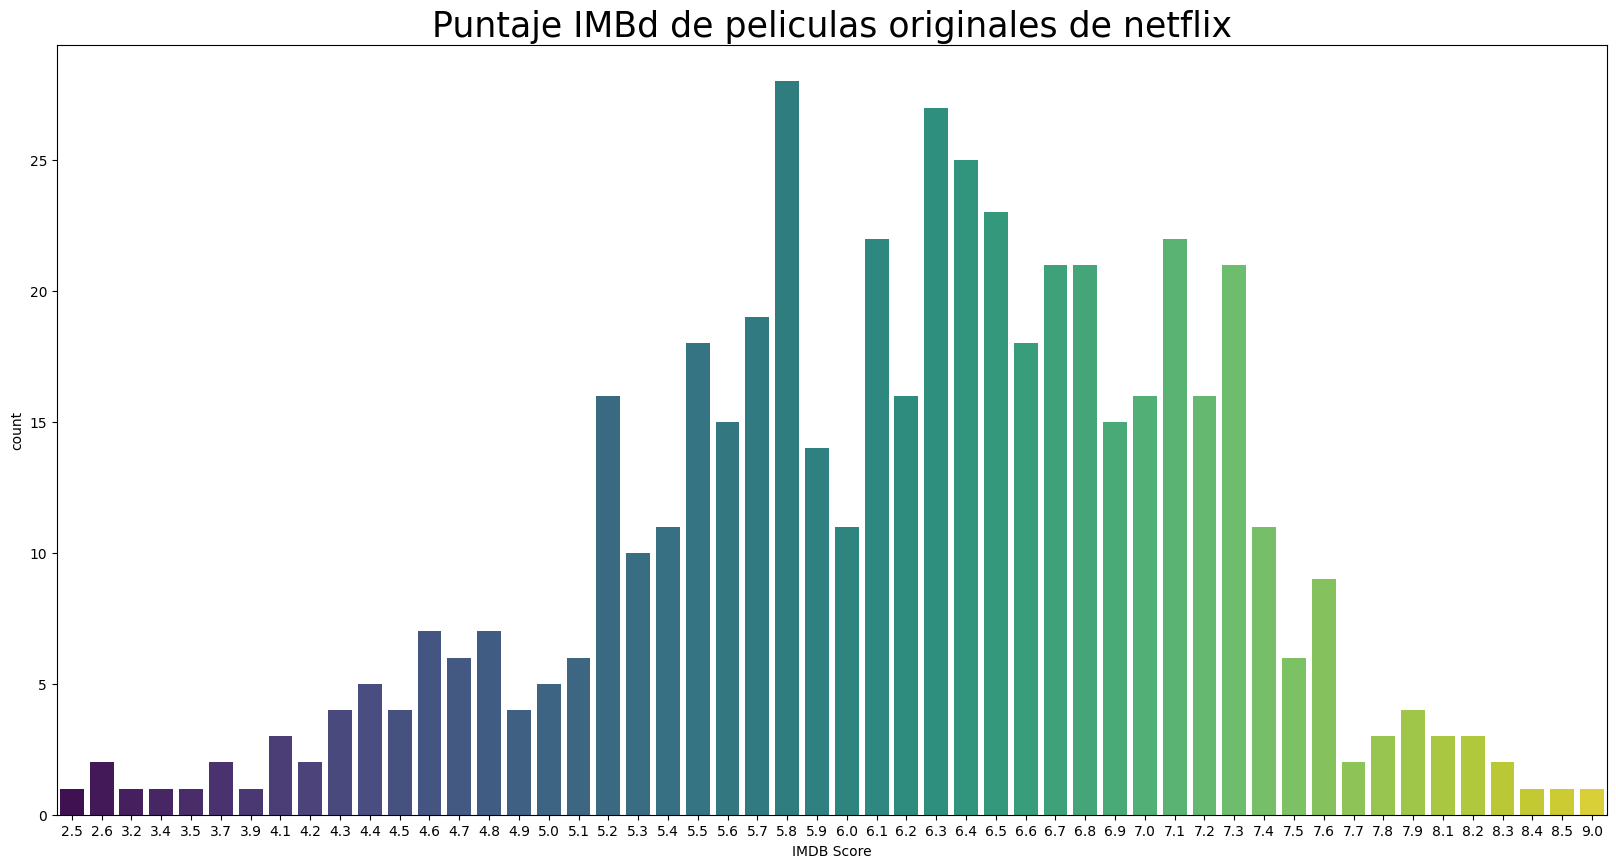

In [74]:
fig = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 10))
sns.countplot(x = "IMDB Score", 
              data = df_orig,
              palette = 'viridis')
plt.title("Puntaje IMBd de peliculas originales de netflix",fontsize = 25)


# Conclusiones EDA -> df_orig

- 513 elementos originales de netflix
- Los documentales de netflix son los mas populares, seguidos por los thrillersm 
- Del total de 513 elementos, 352 son en idioma de ingles. 
- El dia con mayores lanzamientos en la plataforma fue el 18/10/2019
- No se encontraron valores duplicados ni nulos.
Respecto a las variables numericas:
- La media del contenido de netflix es de 6,21 estrellas, esto muy similar a la mediana de 6,3. 
- Casi el 25% del contenido de netflix tiene una nota superior a 7 estrellas, por lo que el contenido que produce netflix es muy mediocre.
- La duracion Media y mediana muy similares en tiempo, entre 94 y 97 minutos respectivamente
- El 75% de las peliculas no llegan a las 2horas. Es decir en su mayoria son cortas.

# PARTE 2: Union de datos

### Creamos columna en df_orig para distinga previo a unificacion, cuales son originales de netflix

In [23]:
df_orig["Es_original"] = 1
df_orig.sample(1)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Es_original
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English,1


### Cambiamos el nombre de la columna para que sea el mismo que el de df_titles

In [24]:
df_orig.rename(columns={'Title': 'title'}, inplace=True)
df_orig.sample(3)

,title,Genre,Premiere,Runtime,IMDB Score,Language,Es_original
91,"To Each, Her Own",Romantic comedy,"June 24, 2018",95,5.3,French,1
138,The Sleepover,Comedy,"August 21, 2020",103,5.6,English,1
204,The Prom,Musical,"December 11, 2020",132,5.9,English,1


### Ahora si podemos hacer mergeo entre df_titles y df_orig por medio de la columna "title"

In [25]:
df_contenido = pd.merge(df_titles, df_orig, on="title", how="left")
df_contenido.set_index('show_id', inplace=True)
df_contenido.sample(10)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre,Premiere,Runtime,IMDB Score,Language,Es_original
show_id,,,,,,,,,,,,,,,,,
s6369,TV Show,Brain Games,NaN,Jason Silva,United States,"March 15, 2019",2016,TV-G,NaN,"Docuseries, Science & Nature TV","This interactive series uses games, illusions ...",NaN,NaN,NaN,NaN,NaN,NaN
s3040,TV Show,The InBESTigators,NaN,"Abby Bergman, Anna Cooke, Aston Droomer, Jamil...",Australia,"January 10, 2020",2020,TV-Y,2 Seasons,"Kids' TV, TV Comedies",Four clever school kids start their own detect...,NaN,NaN,NaN,NaN,NaN,NaN
s6396,Movie,Butterfield 8,Daniel Mann,"Elizabeth Taylor, Laurence Harvey, Eddie Fishe...",United States,"November 1, 2019",1960,TV-14,NaN,"Classic Movies, Dramas, Romantic Movies",Elizabeth Taylor won an Oscar as Gloria Wandro...,NaN,NaN,NaN,NaN,NaN,NaN
s8426,Movie,The Model,Mads Matthiesen,"Maria Palm, Ed Skrein, Yvonnick Muller, Charlo...",Denmark,"December 6, 2016",2016,TV-MA,104 min,"Dramas, Independent Movies, International Movies",Danish teen Emma moves to Paris hoping to beco...,NaN,NaN,NaN,NaN,NaN,NaN
s6761,Movie,FirstBorn,Nirpal Bhogal,"Antonia Thomas, Luke Norris, Thea Petrie, Eile...",United Kingdom,"March 31, 2017",2016,TV-MA,90 min,"Horror Movies, International Movies",A young couple fights supernatural foes in an ...,NaN,NaN,NaN,NaN,NaN,NaN
s1950,TV Show,The Good Place,NaN,"Kristen Bell, Ted Danson, William Jackson Harp...",United States,"September 26, 2020",2020,TV-14,NaN,TV Comedies,"Due to an error, self-absorbed Eleanor Shellst...",NaN,NaN,NaN,NaN,NaN,NaN
s8224,Movie,The Brave One,Neil Jordan,"Jodie Foster, Terrence Howard, Naveen Andrews,...",United States,"November 1, 2019",2007,R,122 min,"Dramas, Thrillers",New York City radio host Erica Bain decides to...,NaN,NaN,NaN,NaN,NaN,NaN
s2081,TV Show,Thomas and Friends,Greg Tiernan,"Michael Angelis, Ben Small, Keith Wickham, Ker...",United Kingdom,"September 1, 2020",2020,TV-Y,2 Seasons,"British TV Shows, Classic & Cult TV, Kids' TV",This animated children's series follows the ad...,NaN,NaN,NaN,NaN,NaN,NaN
s3396,Movie,ChuChuTV Bedtime Stories & Moral Stories for K...,NaN,NaN,NaN,"October 18, 2019",2019,TV-Y,56 min,Children & Family Movies,"In this collection of stories, ChuChu and her ...",NaN,NaN,NaN,NaN,NaN,NaN


Se realizo este tipo de mergeo para integrar la información adicional contenida en df_orig con el conjunto de datos principal df_titles. La columna key utilizada para la combinación es "title", que representa el vínculo lógico entre ambos DataFrames.
Se utilizó un left join para garantizar que todas las filas del DataFrame principal df_titles se mantengan en el resultado final, incluso si no hay una coincidencia en df_orig. Esto asegura que no se pierda ninguna información de los títulos presentes en df_titles,mientras que las filas que no tengan datos coincidentes en df_orig simplemente se rellenarán con NaN.

Que podemos ver a un primer vistazo como punto negativo en el mergeo:
- Tenemos muchos valores nulos con respecto a las categorias que no contabamos en df_titles. Seria muy interesante saber: IMDB, el genero y el lenguaje

# PARTE 2: Uso de `loc` e `iloc`

1. **Filtrado de datos con `loc`:**

- Selecciona todas las filas donde el tipo de contenido sea “Movie”.

In [26]:
df_contenido.loc[df_contenido.type=="Movie"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre,Premiere,Runtime,IMDB Score,Language,Es_original
show_id,,,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentary,"October 2, 2020",90.0,7.5,English,1.0
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,NaN,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,NaN,NaN,NaN,NaN,NaN,NaN
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",NaN,NaN,NaN,NaN,NaN,NaN
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,NaN,NaN,NaN,NaN,NaN,NaN
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,NaN,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,NaN,NaN,NaN,NaN,NaN,NaN
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",NaN,NaN,NaN,NaN,NaN,NaN
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,NaN,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,NaN,NaN,NaN,NaN,NaN,NaN


- Muestra solo los títulos (title) y la duración (duration) de todos los contenidos que sean de tipo “TV Show”.

In [27]:
tv_show = df_contenido.loc[df_contenido.type=="TV Show"]
tv_show[["title","duration"]]

,title,duration
show_id,,
s2,Blood & Water,2 Seasons
s3,Ganglands,NaN
s4,Jailbirds New Orleans,NaN
s5,Kota Factory,2 Seasons
s6,Midnight Mass,NaN
...,...,...
s8796,Yu-Gi-Oh! Arc-V,2 Seasons
s8797,Yunus Emre,2 Seasons
s8798,Zak Storm,NaN


- Selecciona todas las filas donde el país sea “United States”.

In [28]:
df_contenido.loc[df_contenido.country=="United States"]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre,Premiere,Runtime,IMDB Score,Language,Es_original
show_id,,,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentary,"October 2, 2020",90.0,7.5,English,1.0
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,NaN,NaN,NaN,NaN,NaN,NaN
s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,NaN,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,NaN,NaN,NaN,NaN,NaN,NaN
s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,NaN,Comedies,Mourning the loss of their beloved junior high...,NaN,NaN,NaN,NaN,NaN,NaN
s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,NaN,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,NaN,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...,NaN,NaN,NaN,NaN,NaN,NaN
s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,NaN,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...,NaN,NaN,NaN,NaN,NaN,NaN
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",NaN,NaN,NaN,NaN,NaN,NaN


- Muestra todas las películas (type = “Movie”) y selecciona las columnas title y director.

In [29]:
movie = df_contenido.loc[df_contenido.type=="Movie"]
tv_show[["title","director"]]

,title,director
show_id,,
s2,Blood & Water,NaN
s3,Ganglands,Julien Leclercq
s4,Jailbirds New Orleans,NaN
s5,Kota Factory,NaN
s6,Midnight Mass,Mike Flanagan
...,...,...
s8796,Yu-Gi-Oh! Arc-V,NaN
s8797,Yunus Emre,NaN
s8798,Zak Storm,NaN


- Selecciona los títulos (title) y géneros (listed_in) de todas las producciones lanzadas en 2018.

In [30]:
df2018=df_contenido.loc[df_contenido.release_year==2018]
df2018[["title","listed_in"]]

,title,listed_in
show_id,,
s22,Resurrection: Ertugrul,"International TV Shows, TV Action & Adventure,..."
s38,Angry Birds,"Kids' TV, TV Comedies"
s74,King of Boys,"Dramas, International Movies"
s95,Show Dogs,"Children & Family Movies, Comedies"
s97,If I Leave Here Tomorrow: A Film About Lynyrd ...,"Documentaries, Music & Musicals"
...,...,...
s8733,White Chamber,"Sci-Fi & Fantasy, Thrillers"
s8744,Wildlife,"Dramas, Independent Movies"
s8775,يوم الدين,"Dramas, Independent Movies, International Movies"


- Selecciona las filas donde la columna director esté vacía y muestra solo los títulos (title).

In [31]:
direct_0 = df_contenido.loc[df_contenido.director.isna()]
direct_0[["title"]]

,title
show_id,
s2,Blood & Water
s4,Jailbirds New Orleans
s5,Kota Factory
s11,"Vendetta: Truth, Lies and The Mafia"
s15,Crime Stories: India Detectives
...,...
s8796,Yu-Gi-Oh! Arc-V
s8797,Yunus Emre
s8798,Zak Storm


2. **Acceso a datos específicos con `iloc`:**

In [32]:
df_contenido.sample()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Genre,Premiere,Runtime,IMDB Score,Language,Es_original
show_id,,,,,,,,,,,,,,,,,
s6212,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky...",United States,"October 1, 2019",1995,R,119 min,"Action & Adventure, Comedies","In this fast-paced actioner, two Miami narcoti...",NaN,NaN,NaN,NaN,NaN,NaN


   - Selecciona las primeras 5 filas del conjunto de datos y muestra solo las columnas title, director y country.

In [33]:
df5 = df_contenido.iloc[0:5,[1,2,4]]
df5

,title,director,country
show_id,,,
s1,Dick Johnson Is Dead,Kirsten Johnson,United States
s2,Blood & Water,NaN,South Africa
s3,Ganglands,Julien Leclercq,NaN
s4,Jailbirds New Orleans,NaN,NaN
s5,Kota Factory,NaN,India


   - Muestra las últimas 5 filas del conjunto de datos y selecciona las columnas title y description.


In [34]:
df6 = df_contenido.iloc[-5:,[1,10]]
df6

,title,description
show_id,,
s8803,Zodiac,"A political cartoonist, a crime reporter and a..."
s8804,Zombie Dumb,"While living alone in a spooky town, a young g..."
s8805,Zombieland,Looking to survive in a world taken over by zo...
s8806,Zoom,"Dragged from civilian life, a former superhero..."
s8807,Zubaan,A scrappy but poor boy worms his way into a ty...


- Selecciona las primeras 10 filas del dataset y muestra las columnas desde la segunda hasta la quinta (incluidas). 

In [35]:
df10 = df_contenido.iloc[0:10,1:6]
df10

,title,director,cast,country,date_added
show_id,,,,,
s1,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021"
s2,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021"
s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021"
s4,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021"
s5,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021"
s6,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021"
s7,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021"
s8,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021"
s9,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021"


   - Muestra las últimas 7 filas del dataset y selecciona las columnas title, director, y country usando índices posicionales.

In [36]:
df_7 = df_contenido.iloc[-7:,[1,2,4]]
df_7

,title,director,country
show_id,,,
s8801,Zindagi Gulzar Hai,NaN,Pakistan
s8802,Zinzana,Majid Al Ansari,"United Arab Emirates, Jordan"
s8803,Zodiac,David Fincher,United States
s8804,Zombie Dumb,NaN,NaN
s8805,Zombieland,Ruben Fleischer,United States
s8806,Zoom,Peter Hewitt,United States
s8807,Zubaan,Mozez Singh,India


   - Selecciona las filas desde la 15 hasta la 25 (incluidas) y muestra las primeras 4 columnas.

In [37]:
df15 = df_contenido.iloc[15:26,0:4]
df15

,type,title,director,cast
show_id,,,,
s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,..."
s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",NaN
s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri..."
s19,Movie,Intrusion,Adam Salky,"Freida Pinto, Logan Marshall-Green, Robert Joh..."
s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá..."
s21,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton,NaN
s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar..."
s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj..."
s24,Movie,Go! Go! Cory Carson: Chrissy Takes the Wheel,"Alex Woo, Stanley Moore","Maisie Benson, Paul Killam, Kerry Gudjohnsen, ..."


- Muestra las filas 20 a 30 y solo las columnas title, release_year, y rating usando índices posicionales.

In [38]:
df2030 = df_contenido.iloc[20:31,[1,6,7]]
df2030

,title,release_year,rating
show_id,,,
s21,Monsters Inside: The 24 Faces of Billy Milligan,2021,TV-14
s22,Resurrection: Ertugrul,2018,TV-14
s23,Avvai Shanmughi,1996,TV-PG
s24,Go! Go! Cory Carson: Chrissy Takes the Wheel,2021,TV-Y
s25,Jeans,1998,TV-14
s26,Love on the Spectrum,2021,TV-14
s27,Minsara Kanavu,1997,TV-PG
s28,Grown Ups,2010,PG-13
s29,Dark Skies,2013,PG-13


# GUARDAMOS EL CONJUNTO DE DATOS

In [39]:
df_contenido.to_csv("df_contenido.csv", index=True)  